# Final Project Submission
## Please fill out:

* Student name: Nastaran Nazemian
* Student pace: part time
* Scheduled project review date/time: 28/4/2020 1:30PM (PS)
* Instructor name: Eli Thomas
* Blog post URL:?????????????

In [1]:
import re
import numpy as np
import pandas as pd
import math
import json
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
my_data = open("clean1_data.json", "r")
data = data = pd.read_json(r'C:\Flatiron\course-material\ModuleOneFinalProject\dsc-mod-1-project-v2-1-onl01-dtsc-pt-030220\clean1_data.json')
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1499
Data columns (total 19 columns):
Title_id                      1234 non-null object
Budget                        1234 non-null float64
Gross USA                     1234 non-null int64
Cumulative Worldwide Gross    1234 non-null int64
Opening Weekend USA           1221 non-null float64
Title                         1234 non-null object
Year                          1234 non-null int64
Popularity                    1234 non-null int64
Genre                         1234 non-null object
Runtime_min                   1234 non-null float64
Release_day                   1234 non-null object
IMDB_Rate                     1234 non-null float64
Rating_count                  1234 non-null int64
Director                      1234 non-null object
Writer                        1234 non-null object
Star                          1234 non-null object
User_Review_Number            1234 non-null int64
Critical_Review_Number      

In [4]:
df.describe()

,Budget,Gross USA,Cumulative Worldwide Gross,Opening Weekend USA,Year,Popularity,Runtime_min,IMDB_Rate,Rating_count,User_Review_Number,Critical_Review_Number
count,1.234000e+03,1.234000e+03,1.234000e+03,1.221000e+03,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03,1234.000000,1234.000000
mean,5.478507e+07,6.970089e+07,1.765377e+08,2.082468e+07,2014.988655,1837.764992,111.765600,6.563209,1.556481e+05,512.859806,286.974878
std,5.101234e+07,8.992017e+07,2.463631e+08,2.898003e+07,2.888274,1183.224461,16.201106,0.862544,1.769851e+05,609.917257,153.644095
min,5.000000e+04,4.220000e+02,4.825000e+03,2.940000e+02,2010.000000,6.000000,79.000000,2.700000,8.560000e+02,20.000000,5.000000
25%,2.000000e+07,1.210596e+07,2.390642e+07,9.161790e+05,2013.000000,797.250000,100.000000,6.100000,4.413125e+04,196.000000,171.250000
50%,3.800000e+07,3.922865e+07,8.141613e+07,1.200521e+07,2015.000000,1726.500000,109.699136,6.600000,9.760150e+04,330.000000,266.000000
75%,7.000000e+07,9.022536e+07,2.168892e+08,2.624741e+07,2018.000000,2808.750000,120.000000,7.200000,1.999280e+05,618.250000,382.750000
max,2.250000e+08,7.000596e+08,1.670401e+09,2.088063e+08,2020.000000,4164.000000,180.000000,8.800000,1.951015e+06,9870.000000,994.000000


In [6]:
df.corr()

,Budget,Gross USA,Cumulative Worldwide Gross,Opening Weekend USA,Year,Popularity,Runtime_min,IMDB_Rate,Rating_count,User_Review_Number,Critical_Review_Number
Budget,1.000000,0.648894,0.729775,0.662559,-0.081797,-0.276779,0.284951,0.080203,0.440731,0.354845,0.393261
Gross USA,0.648894,1.000000,0.944347,0.925197,-0.083191,-0.383067,0.242615,0.261321,0.612246,0.493939,0.508679
Cumulative Worldwide Gross,0.729775,0.944347,1.000000,0.893800,-0.068926,-0.376416,0.251336,0.238283,0.604431,0.505681,0.500756
Opening Weekend USA,0.662559,0.925197,0.893800,1.000000,-0.073761,-0.320598,0.207215,0.126449,0.536110,0.453903,0.448562
Year,-0.081797,-0.083191,-0.068926,-0.073761,1.000000,-0.207963,0.021146,-0.064236,-0.333412,0.134943,-0.292063
Popularity,-0.276779,-0.383067,-0.376416,-0.320598,-0.207963,1.000000,-0.354429,-0.365828,-0.461099,-0.499026,-0.477122
Runtime_min,0.284951,0.242615,0.251336,0.207215,0.021146,-0.354429,1.000000,0.377152,0.366285,0.329467,0.385840
IMDB_Rate,0.080203,0.261321,0.238283,0.126449,-0.064236,-0.365828,0.377152,1.000000,0.500804,0.254291,0.489973
Rating_count,0.440731,0.612246,0.604431,0.536110,-0.333412,-0.461099,0.366285,0.500804,1.000000,0.552973,0.764217
User_Review_Number,0.354845,0.493939,0.505681,0.453903,0.134943,-0.499026,0.329467,0.254291,0.552973,1.000000,0.570293


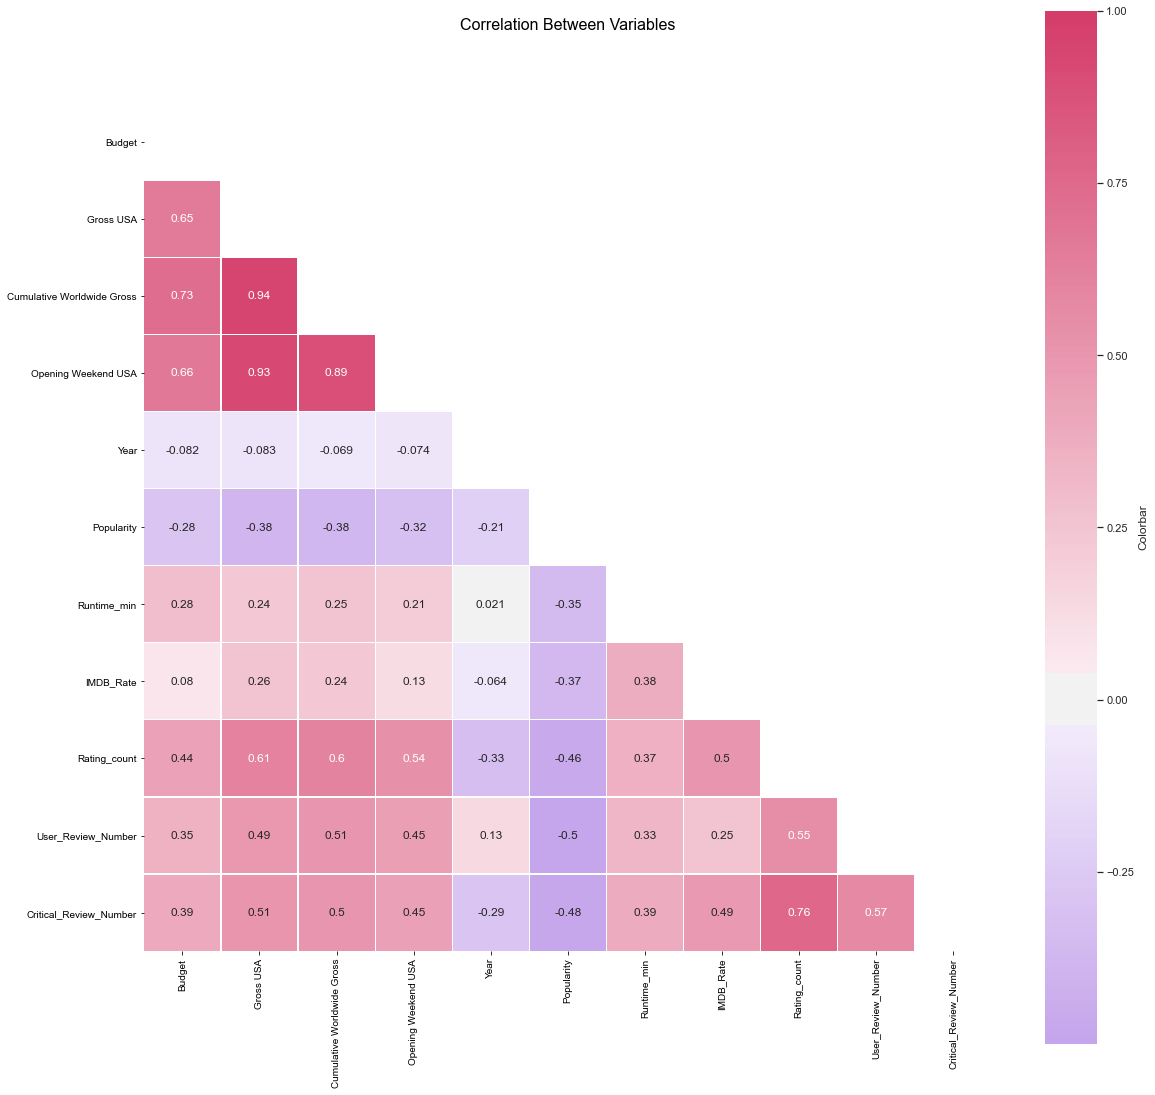

In [7]:
f, ax = plt.subplots(figsize=(19,19))
corr = df.corr()
sns.set(font_scale=1)
cmap = sns.diverging_palette(1000, 0, as_cmap=True)
matrix = np.triu(corr)
ax.set_title('Correlation Between Variables', y=1.2, fontsize=16, ha='center').set_position([0.5,1.08])
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.2, ax=ax, annot=True, mask=matrix, 
            cbar_kws={'label': 'Colorbar'})
#plt.title('Correlation Between Variables', fontsize=20, ha='center')
plt.show()

In [8]:
corr_df1 = df[['Budget','Gross USA','Cumulative Worldwide Gross','Rating_count','IMDB_Rate','Popularity']].corr()
corr_df1

,Budget,Gross USA,Cumulative Worldwide Gross,Rating_count,IMDB_Rate,Popularity
Budget,1.000000,0.648894,0.729775,0.440731,0.080203,-0.276779
Gross USA,0.648894,1.000000,0.944347,0.612246,0.261321,-0.383067
Cumulative Worldwide Gross,0.729775,0.944347,1.000000,0.604431,0.238283,-0.376416
Rating_count,0.440731,0.612246,0.604431,1.000000,0.500804,-0.461099
IMDB_Rate,0.080203,0.261321,0.238283,0.500804,1.000000,-0.365828
Popularity,-0.276779,-0.383067,-0.376416,-0.461099,-0.365828,1.000000


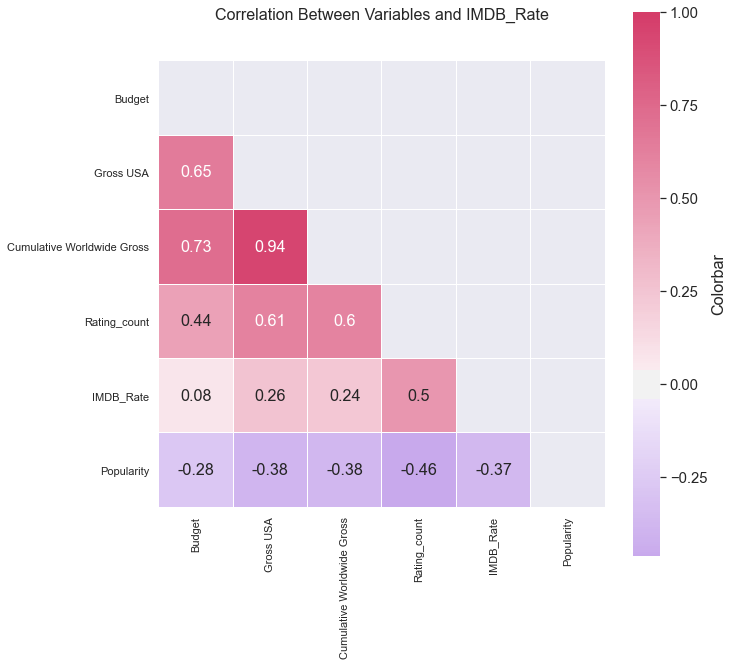

In [9]:
f, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.35)
cmap = sns.diverging_palette(1000, 0, as_cmap=True)
matrix = np.triu(corr_df1)
ax.set_title('Correlation Between Variables and IMDB_Rate', y=1.2, fontsize=16, ha='center').set_position([0.5,1.08])

sns.heatmap(corr_df1, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.2, ax=ax, annot=True, mask=matrix, 
            cbar_kws={'label': 'Colorbar'})
plt.show()

In [10]:
df['Foreign_Gross'] = df['Cumulative Worldwide Gross'] - df['Gross USA']
df['Global_Revenue'] = df['Cumulative Worldwide Gross'] - df['Budget']
df['US_Revenue'] = df['Gross USA'] - df['Budget']
df['Foreign_Revenue'] = df['Foreign_Gross'] - df['Budget']
df['Global_Revenue_Expense_Ratio'] = df['Global_Revenue'] / df['Budget']
df['US_Revenue_Expense_Ratio'] = df['US_Revenue'] / df['Budget']
df['Foreign_Revenue_Expense_Ratio'] = df['Foreign_Gross']/  df['Budget']

In [11]:
df[['Budget','Gross USA','Cumulative Worldwide Gross','Foreign_Gross']].corr()

,Budget,Gross USA,Cumulative Worldwide Gross,Foreign_Gross
Budget,1.000000,0.648894,0.729775,0.739887
Gross USA,0.648894,1.000000,0.944347,0.869605
Cumulative Worldwide Gross,0.729775,0.944347,1.000000,0.983628
Foreign_Gross,0.739887,0.869605,0.983628,1.000000


In [12]:
Pearson_Corr_Profit = df[['Foreign_Gross','Global_Revenue','US_Revenue','Foreign_Revenue',
                           'Global_Revenue_Expense_Ratio', 'US_Revenue_Expense_Ratio',
                           'Foreign_Revenue_Expense_Ratio']].apply(lambda x: x.corr(df['IMDB_Rate'] ))
display(Pearson_Corr_Profit)


Foreign_Gross                    0.214495
Global_Revenue                   0.257578
US_Revenue                       0.282031
Foreign_Revenue                  0.237576
Global_Revenue_Expense_Ratio     0.149847
US_Revenue_Expense_Ratio         0.107158
Foreign_Revenue_Expense_Ratio    0.168562
dtype: float64

In [13]:
import nbimporter
import datacleaning as dc
#from datacleaning import flatten_genre
#dc.remove_outlier()
#df.head()
flatten_df = dc.flatten_genre(df)
flatten_df.head()

Importing Jupyter notebook from datacleaning.ipynb


,Title_id,Budget,Gross USA,Cumulative Worldwide Gross,Opening Weekend USA,Title,Year,Popularity,Runtime_min,Release_day,...,Critical_Review_Number,Meta_Rating,Foreign_Gross,Global_Revenue,US_Revenue,Foreign_Revenue,Global_Revenue_Expense_Ratio,US_Revenue_Expense_Ratio,Foreign_Revenue_Expense_Ratio,Genre
0,tt8367814,22000000.0,36296853,114996853,10651884.0,The Gentlemen,2019,6,113.0,01/24/2020,...,231,R,78700000,92996853.0,14296853.0,56700000.0,4.227130,0.649857,3.577273,Action
1,tt7131622,90000000.0,142502728,374343626,41082018.0,Once Upon a Time... in Hollywood,2019,8,161.0,07/26/2019,...,594,R,231840898,284343626.0,52502728.0,141840898.0,3.159374,0.583364,2.576010,Comedy
2,tt8946378,40000000.0,165363234,309232797,26769548.0,Knives Out,2019,10,131.0,11/27/2019,...,417,PG-13,143869563,269232797.0,125363234.0,103869563.0,6.730820,3.134081,3.596739,Comedy
3,tt8579674,95000000.0,159227644,368027644,576216.0,1917,2019,13,119.0,01/10/2020,...,447,R,208800000,273027644.0,64227644.0,113800000.0,2.873975,0.676080,2.197895,Drama
4,tt1598778,60000000.0,75658097,136515867,22403596.0,Contagion,2011,15,106.0,09/09/2011,...,255,PG-13,60857770,76515867.0,15658097.0,857770.0,1.275264,0.260968,1.014296,Action


In [25]:
popular_genres = dc.get_all_genres_count(flatten_df).sort_values(ascending=False)
popular_genres
#popular_genres.sum()

Genre
Drama        667
Thriller     437
Comedy       424
Action       412
Adventure    338
Romance      222
Crime        214
Sci-Fi       205
Fantasy      201
Mystery      181
Horror       160
Family       142
Biography    138
Animation     76
History       67
War           46
Music         37
Sport         34
Musical       28
Western       18
Name: Genre, dtype: int64

In [27]:
Total_Popularity = sum(flatten_df['Popularity'])
popularity_perc_df = flatten_df.groupby(['Genre']).agg({'Popularity': 'sum'})
print(popularity_perc_df)
popularity_perc_df['Popularity_perc'] = round(popularity_perc_df['Popularity'] * 100 / Total_Popularity,2)
#popularity_perc_df['Popularity_perc'] = popularity_perc_df['Popularity_perc'].round(1).astype(str) + '%'
popularity_perc_df = popularity_perc_df.sort_values(by='Popularity_perc', ascending=False)
# popularity_perc_df['Genre'] = popularity_perc_df.index
popularity_perc_df = popularity_perc_df.reset_index()
top_ten_popularity_perc_df = popularity_perc_df[:10]
popularity_perc_df.sum()

           Popularity
Genre                
Action         682204
Adventure      515033
Animation      145659
Biography      249128
Comedy         859281
Crime          394108
Drama         1293340
Family         263785
Fantasy        343920
History        127334
Horror         307509
Music           66521
Musical         35718
Mystery        321399
Romance        486186
Sci-Fi         291802
Sport           63742
Thriller       793339
War             84406
Western         28283


Genre              DramaComedyThrillerActionAdventureRomanceCrime...
Popularity                                                   7352697
Popularity_perc                                                  100
dtype: object

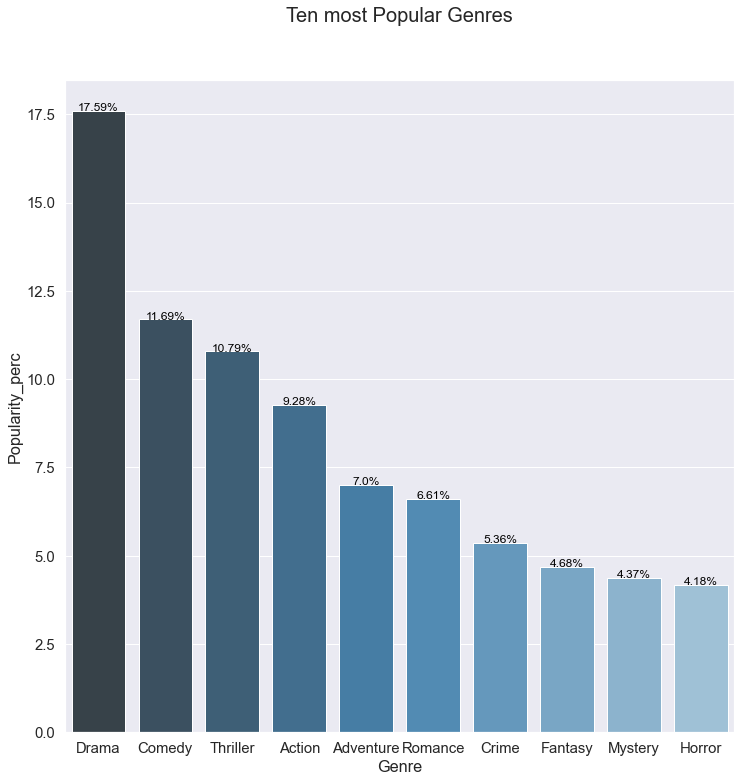

In [16]:
f, ax = plt.subplots(figsize=(12,12))
sns.set(style="whitegrid")
ax.set_title('Ten most Popular Genres', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
ax = sns.barplot(x="Genre", y="Popularity_perc", data= top_ten_popularity_perc_df, palette="Blues_d")
for index, row in top_ten_popularity_perc_df.iterrows():
    ax.text(row.name,row.Popularity_perc, str(row.Popularity_perc)+ '%', color='black', ha="center")

In [17]:
flatten_df.keys()

Index(['Title_id', 'Budget', 'Gross USA', 'Cumulative Worldwide Gross',
       'Opening Weekend USA', 'Title', 'Year', 'Popularity', 'Runtime_min',
       'Release_day', 'IMDB_Rate', 'Rating_count', 'Director', 'Writer',
       'Star', 'User_Review_Number', 'Critical_Review_Number', 'Meta_Rating',
       'Foreign_Gross', 'Global_Revenue', 'US_Revenue', 'Foreign_Revenue',
       'Global_Revenue_Expense_Ratio', 'US_Revenue_Expense_Ratio',
       'Foreign_Revenue_Expense_Ratio', 'Genre'],
      dtype='object')

In [18]:
##Return on investment 

Return_investment_df = flatten_df.groupby(['Genre']).agg({'Global_Revenue_Expense_Ratio': 'mean','US_Revenue_Expense_Ratio': 'mean' })
Return_investment_df = Return_investment_df.sort_values(by=['US_Revenue_Expense_Ratio','Global_Revenue_Expense_Ratio'], ascending=False)
Return_investment_df
Return_investment_df = Return_investment_df.reset_index()
Return_investment_df
top_five_Return_investment_df = Return_investment_df[:5]
top_five_Return_investment_df

,Genre,Global_Revenue_Expense_Ratio,US_Revenue_Expense_Ratio
0,Horror,6.110599,2.691319
1,Mystery,4.835165,1.810687
2,Music,4.131822,1.559735
3,Thriller,3.488191,1.102707
4,Musical,3.554514,0.870821


In [19]:
# Return_investment_US_df = flatten_df.groupby(['Genre']).agg({'US_Revenue_Expense_Ratio': 'mean'})
# Return_investment_US_df = Return_investment_US_df.sort_values(by='US_Revenue_Expense_Ratio', ascending=False)
# Return_investment_US_df = Return_investment_US_df.reset_index()
# Return_investment_US_df
# top_ten_USA_investment_df = Return_investment_US_df[:11]
# top_ten_USA_investment_df

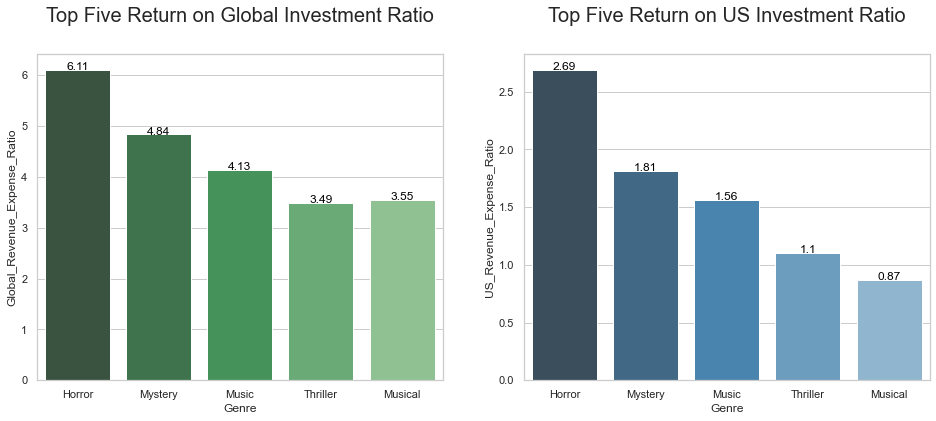

In [28]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set(style="whitegrid")



sns.barplot(x="Genre", y="Global_Revenue_Expense_Ratio", data= top_five_Return_investment_df , palette="Greens_d", ax=ax1)
ax1.set_title('Top Five Return on Global Investment Ratio', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
for index, row in top_five_Return_investment_df.iterrows():
    ax1.text(row.name,row.Global_Revenue_Expense_Ratio, round(row.Global_Revenue_Expense_Ratio,2), color='black', ha="center")

    
    
sns.barplot(x="Genre", y="US_Revenue_Expense_Ratio", data= top_five_Return_investment_df, palette="Blues_d", ax=ax2)
ax2.set_title('Top Five Return on US Investment Ratio', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
for index, row in top_five_Return_investment_df.iterrows():
    ax2.text(row.name,row.US_Revenue_Expense_Ratio, round(row.US_Revenue_Expense_Ratio,2), color='black', ha="center") 

In [21]:
IMBD_Rating_Genre = flatten_df.groupby(['Genre']).agg({'IMDB_Rate': ['mean', 'min', 'max']})
IMBD_Rating_Genre

IMDB_Rate          
               mean  min  max
Genre                        
Action     6.478883  3.1  8.8
Adventure  6.560651  3.2  8.8
Animation  6.881579  3.2  8.4
Biography  7.051449  4.8  8.2
Comedy     6.475472  2.7  8.3
Crime      6.635047  3.8  8.5
Drama      6.757421  2.7  8.6
Family     6.666901  2.7  8.4
Fantasy    6.397512  2.7  8.4
History    6.901493  5.2  8.1
Horror     6.085000  2.7  7.7
Music      6.932432  5.6  8.5
Musical    6.610714  2.7  8.0
Mystery    6.434254  3.1  8.4
Romance    6.490991  4.1  8.0
Sci-Fi     6.562439  4.2  8.8
Sport      7.082353  5.3  8.2
Thriller   6.467277  3.1  8.8
War        6.991304  5.4  8.3
Western    6.744444  4.7  8.4

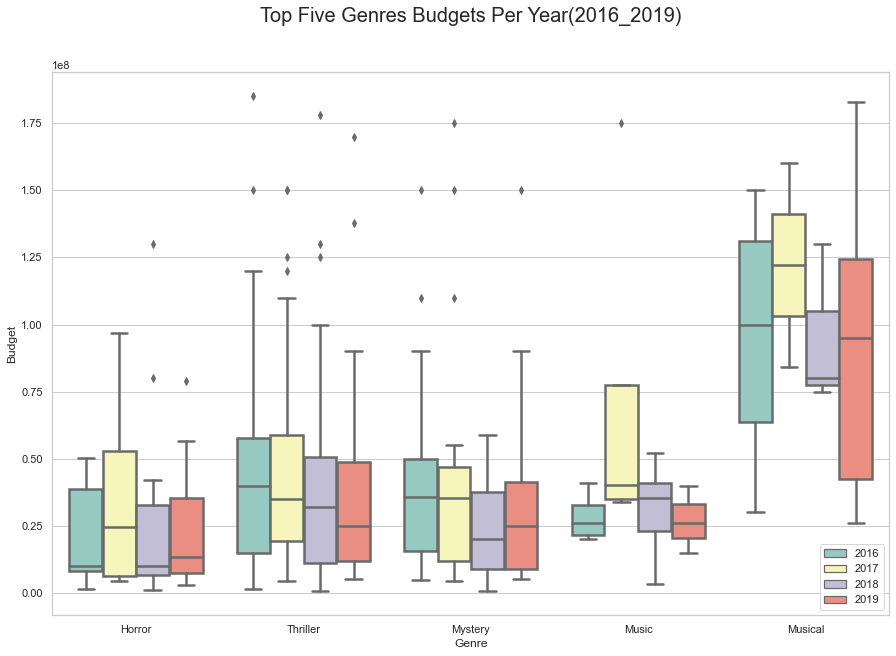

In [30]:

df2 = flatten_df.loc[flatten_df['Genre'].isin(['Horror', 'Mystery', 'Music', 'Thriller', 'Musical']) &\
                     (flatten_df['Year'] > 2015) & (flatten_df['Year'] < 2020)]
f, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top Five Genres Budgets Per Year(2016_2019)', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
sns.axes_style(style='ticks')
sns.boxplot(x="Genre", y="Budget", hue="Year", data=df2, palette="Set3", linewidth=2.5)
#sns.despine(offset=10, trim=True)
plt.legend(loc='lower right')

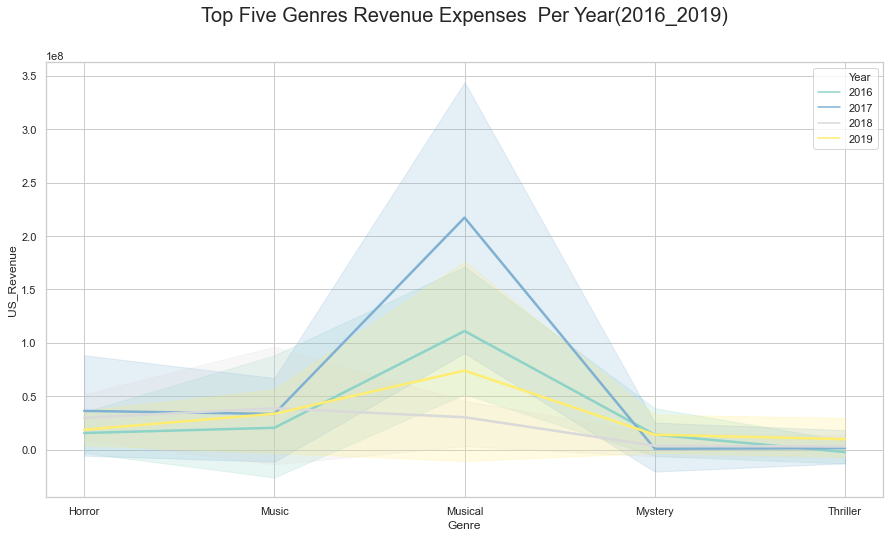

In [34]:

df3 = flatten_df.loc[flatten_df['Genre'].isin(['Horror', 'Mystery', 'Music', 'Thriller', 'Musical']) &\
                     (flatten_df['Year'] > 2015) & (flatten_df['Year'] < 2020)]
df3.head()
f, ax = plt.subplots(figsize=(15,8))
ax.set_title('Top Five Genres Revenue Expenses  Per Year(2016_2019)', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
sns.axes_style(style='ticks')
sns.lineplot(x="Genre", y="US_Revenue", hue="Year", data=df3, palette="Set3", linewidth=2.5)
#sns.despine(offset=10, trim=True)
plt.legend(loc='upper right')

In [ ]:
# import matplotlib
# print('matplotlib: {}'.format(matplotlib.__version__))